## Agenda
* Get a taste of plotting with `matplotlib` (*de facto* plotting in python)
* Take `ggplot` (grammer of graphics plotting) out for a spin

In [1]:
# familiar imports at top
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# matplotlib and ggplot are very verbose
import warnings
warnings.filterwarnings('ignore')

## Matplotlib

**A simple line plot**

In [3]:
# our data
x = np.linspace(0, 2, 10)
x

array([ 0.        ,  0.22222222,  0.44444444,  0.66666667,  0.88888889,
        1.11111111,  1.33333333,  1.55555556,  1.77777778,  2.        ])

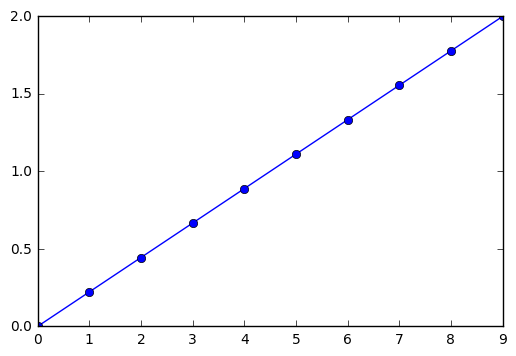

In [4]:
# call plot method
plt.plot(x, 'o-') # 'o-' is a line with circle markers

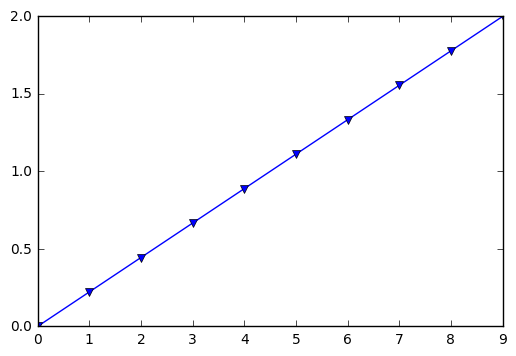

In [5]:
# try changing the plot to use triangle markers (uncomment below and add data from above or your own)
plt.plot(x, '-v')

**A fancier line plot**

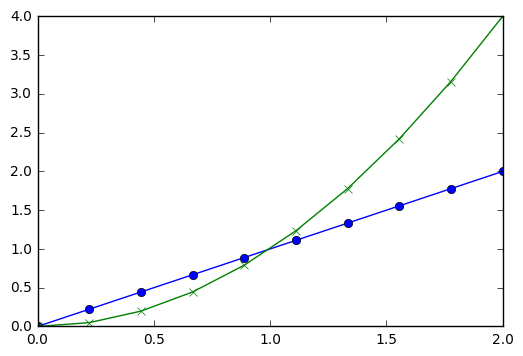

In [6]:
# two lines on a plot

# call plot once
plt.plot(x, x, 'o-', label='linear') # line with circle markers

# call plot twice
plt.plot(x, x ** 2, 'x-', label='quadratic') # line with cross markers

**Add helpful info to same plot** (legends, labels, etc.)

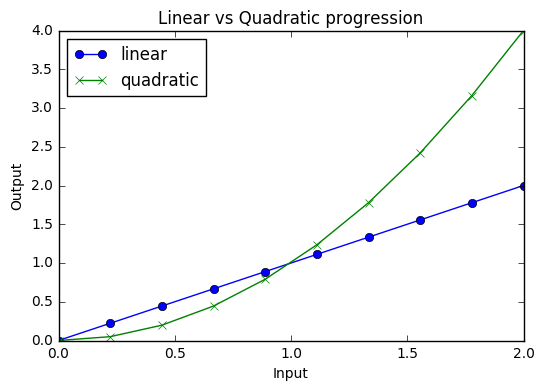

In [7]:
# call plot once
plt.plot(x, x, 'o-', label='linear')

# call plot twice
plt.plot(x, x ** 2, 'x-', label='quadratic')

# add some helpful info to the plot
plt.legend(loc='best')
plt.title('Linear vs Quadratic progression')
plt.xlabel('Input')
plt.ylabel('Output')

**A simple scatter plot** (with helpful info)

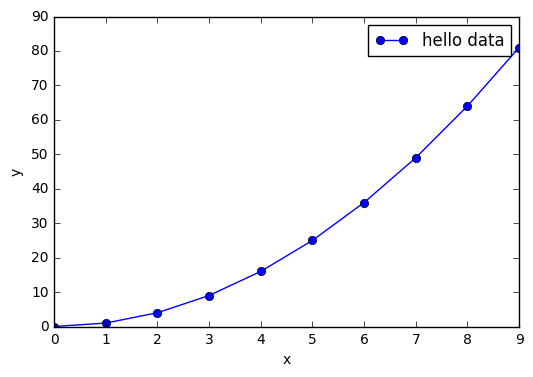

In [8]:
# data
x = np.arange(10)
y = x ** 2

# plot!
plt.plot(x, y, '-o') # line w/ circle markers

# helpful info
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['hello data'], loc = 'best')

# there's also a scatter function, but plot has more general options
# plt.scatter(x, y)

**A simple histogram**

In [9]:
# data for hist
samples = np.random.normal(loc=1.0, scale=0.5, size=1000)

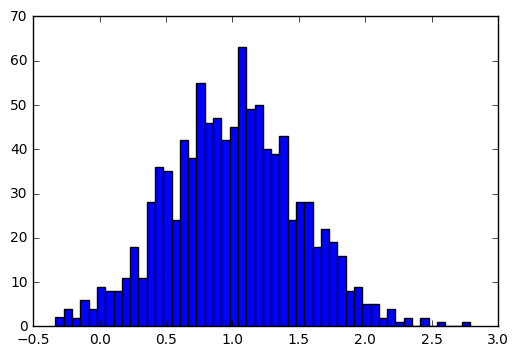

In [10]:
_ = plt.hist(samples, bins=50)

**Aside: making subplots with `figure` and `subplot`**

In [11]:
# data
x = np.arange(100)
y = np.cos(x)
z = np.cos(np.pi * x)

(-2, 2)

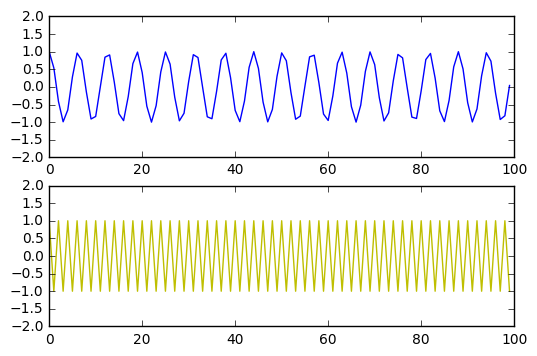

In [12]:
# figure and subplots
fig = plt.figure()

# first subplot
ax1 = fig.add_subplot(2,1,1) # two rows, one column, first plot
ax1.plot(x, y)
ax1.set_ylim([-2, 2])

# another subplot
ax2 = fig.add_subplot(212) # alternate notation
ax2.plot(x, z, color = 'y') # add color as well
ax2.set_ylim([-2, 2])

## `ggplot` 
* **grammer of graphics for python, finally!**

In [13]:
%matplotlib inline
from ggplot import *
import numpy as np

### Easiest to see how `ggplot` works in terms of layers

#### Built-in dataset `mtcars` (yes, just like `ggplot2` in R)
* `mtcars` is a `pandas` DataFrame, FYI

In [14]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**mtcars format**

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon<br>
[, 2]	cyl	Number of cylinders<br>
[, 3]	disp	Displacement (cu.in.)<br>
[, 4]	hp	Gross horsepower<br>
[, 5]	drat	Rear axle ratio<br>
[, 6]	wt	Weight (1000 lbs)<br>
[, 7]	qsec	1/4 mile time<br>
[, 8]	vs	V/S<br>
[, 9]	am	Transmission (0 = automatic, 1 = manual)<br>
[,10]	gear	Number of forward gears<br>
[,11]	carb	Number of carburetors<br>

Source: Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391Ã¢ÂÂ411.

### Preprocessing (continuous to discrete)
* Create a couple new columns with some numerical values converted to strings to indicate they should be interpreted as discrete by `ggplot`

In [15]:
mtcars['am_str'] = ['automatic' if x == 0 else 'manual' for x in mtcars['am']]
mtcars['cyl_str'] = ['4' if x == 4.0 else '6' if x == 6.0 else '8' for x in mtcars['cyl']]

### `ggplot` example 1: simple x-y plot

<b>Create the "canvas" and attach data to it</b> (again, if you use R, you will think this is the same...it is)

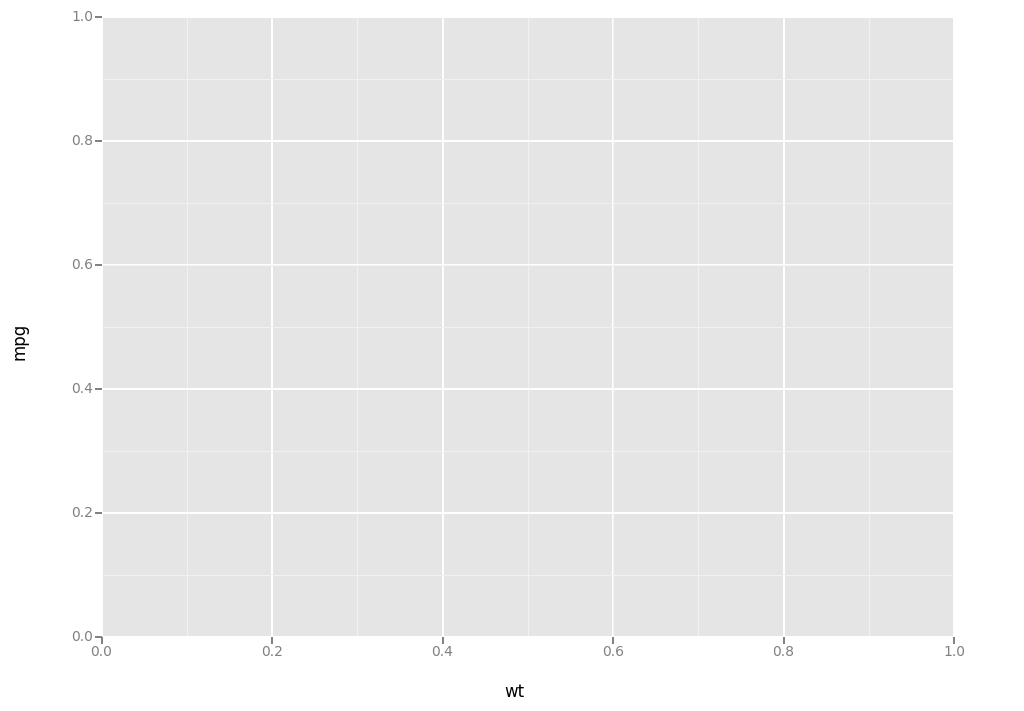

<ggplot: (279051044)>

In [16]:
p = ggplot(aes(x='wt', y='mpg'), data=mtcars)
p

<b>Add some points</b>

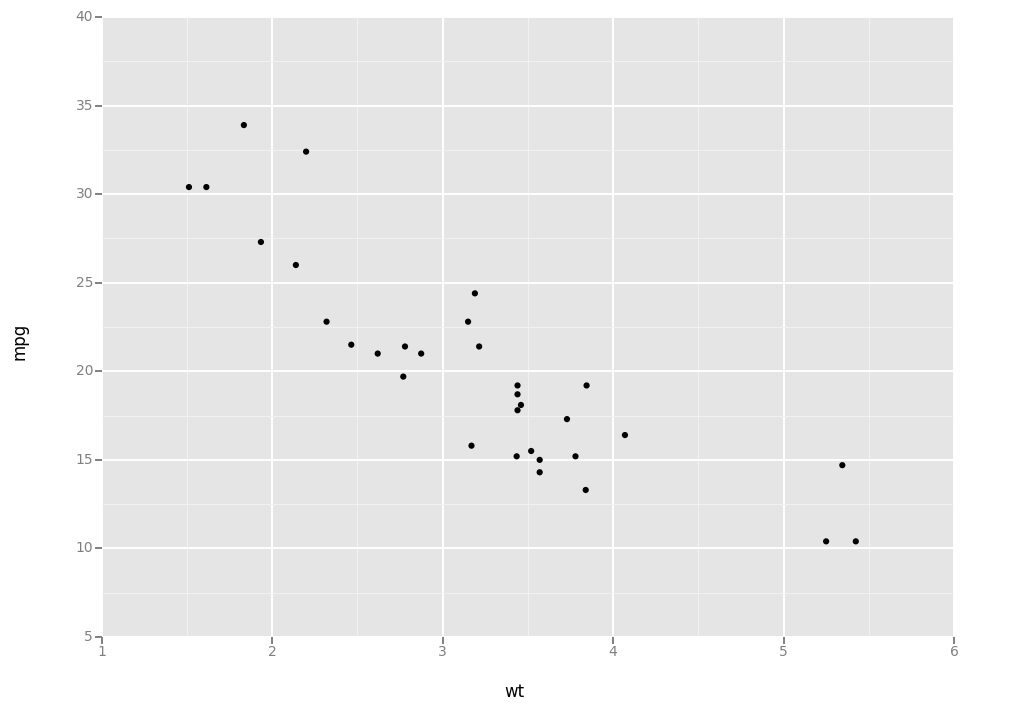

<ggplot: (279051044)>

In [17]:
p = p + geom_point()
p

<b>Add a trendline</b>
This is done by
```python
stat_smooth(color="blue")
```

In [18]:
# add the trendline.  Fill in the blanks.
# p = ___ + ___
# p

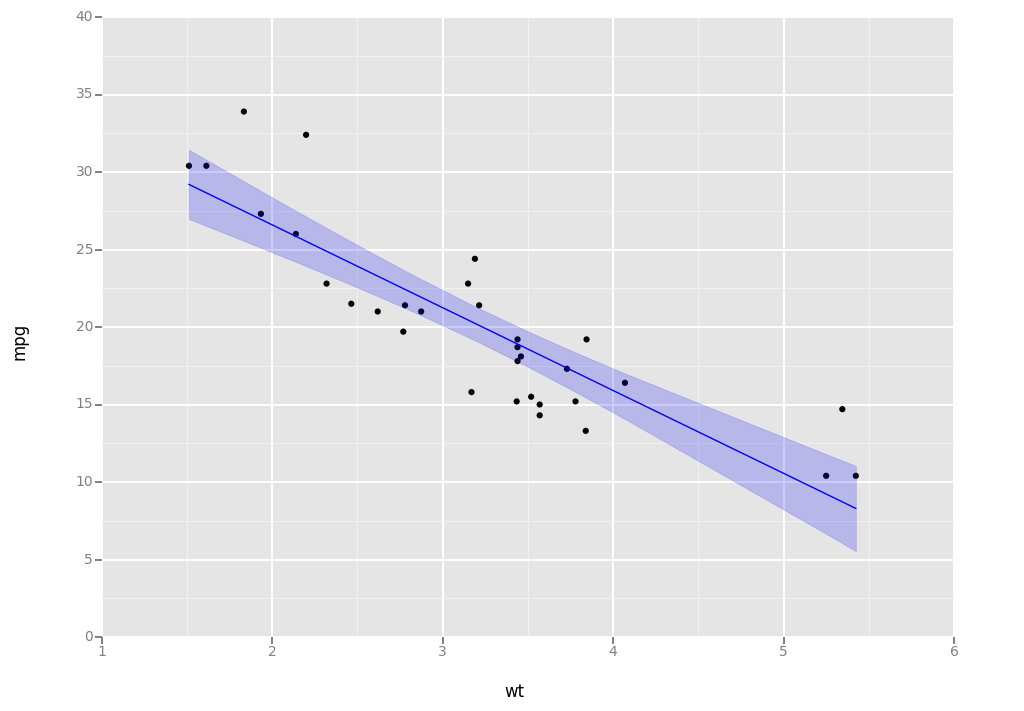

<ggplot: (279051044)>

In [19]:
# add the trendline.  Filled in blanks.
p = p + stat_smooth(color = 'blue')
p

<b>Let's be a good data scientist and add units (might as well give the plot a title)</b>

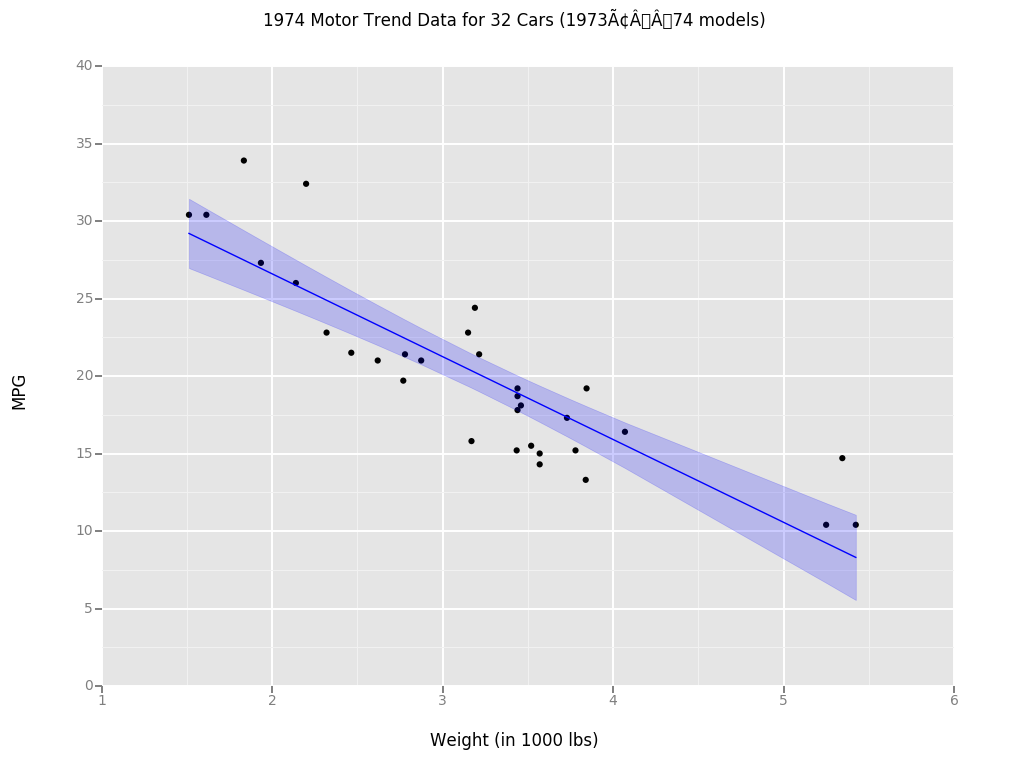

<ggplot: (-9223372036577956110)>

In [20]:
p = ggplot(aes(x='wt', y='mpg'), data=mtcars) +\
    geom_point() +\
    stat_smooth(color="blue") +\
    xlab("Weight (in 1000 lbs)") + ylab("MPG") +\
    ggtitle("1974 Motor Trend Data for 32 Cars (1973Ã¢ÂÂ74 models)")

p

### `ggplot` example 2: x-y plot with colors and shapes

It'll look like:


```python
ggplot(data, aes(x='x', y='y', color='var1', shape = 'var2')) ...
```

Where **`color`** with automatically pick colors for the categorical variable `var1` and **`shape`** will auto-pick a shape for the categorical variable `var2`.

In [21]:
# peek at data
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
# summary stats - remember this from DataAnalysis?  Filled in blank.
diamonds.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


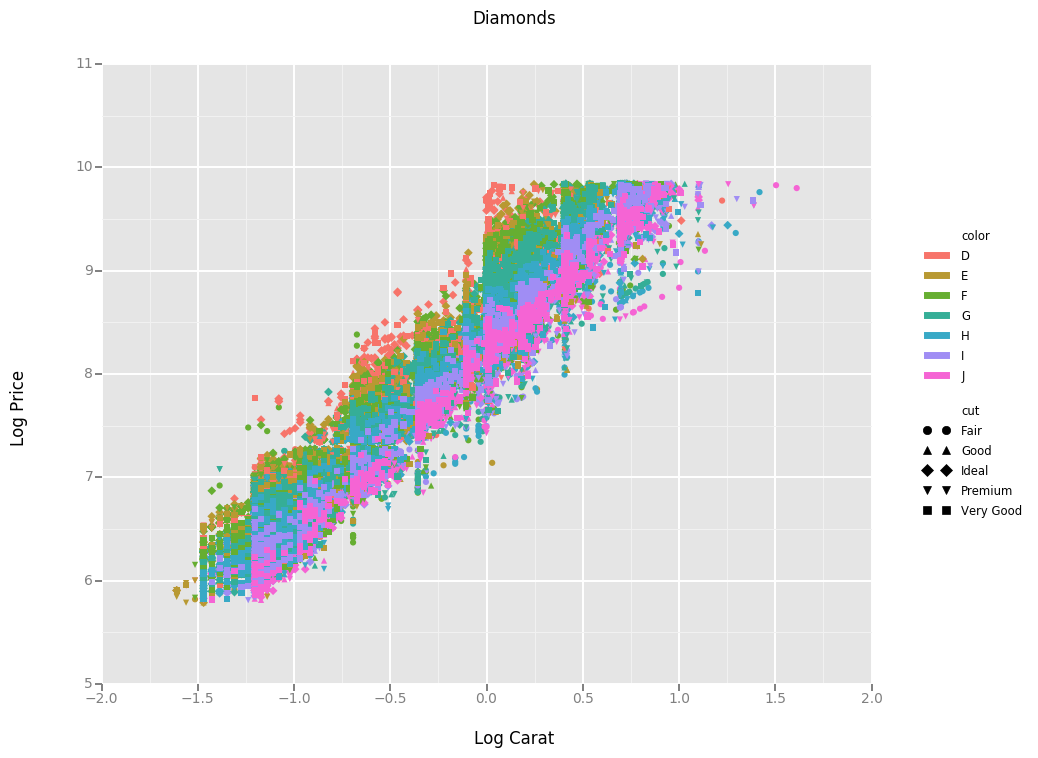

<ggplot: (-9223372036575676956)>

In [23]:
# log-log scale for x and y
diamonds['carat_log'] = np.log(diamonds['carat'])
diamonds['price_log'] = np.log(diamonds['price'])

p = ggplot(diamonds, aes(x='carat_log', y='price_log', color='color', shape = 'cut')) +\
    geom_point() +\
    xlab("Log Carat") + ylab("Log Price") +\
    ggtitle("Diamonds")

p

### `ggplot` example 3: lineplot with colors and variable widths

In [24]:
import seaborn as sbn
flights = sbn.load_dataset("flights")

flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [25]:
from datetime import datetime

dates = flights.apply(lambda x:'%s %s %s' % (x['year'], x['month'], 1), axis = 1)

dates = dates.apply(lambda x: datetime.strptime(x, '%Y %B %d'))

flights['date'] = dates

dates.head()

0   1949-01-01
1   1949-02-01
2   1949-03-01
3   1949-04-01
4   1949-05-01
dtype: datetime64[ns]

In [26]:
import pandas as pd
mymonths = ['January', 'April', 'July', 'October']
seasons = flights[flights.month.isin(mymonths)].copy()

# recategorize the newly formed "seasons" dataframe, specifically the month column, 
#   due to copying over all months from flights
seasons.month = pd.Categorical(seasons.month, categories = mymonths)

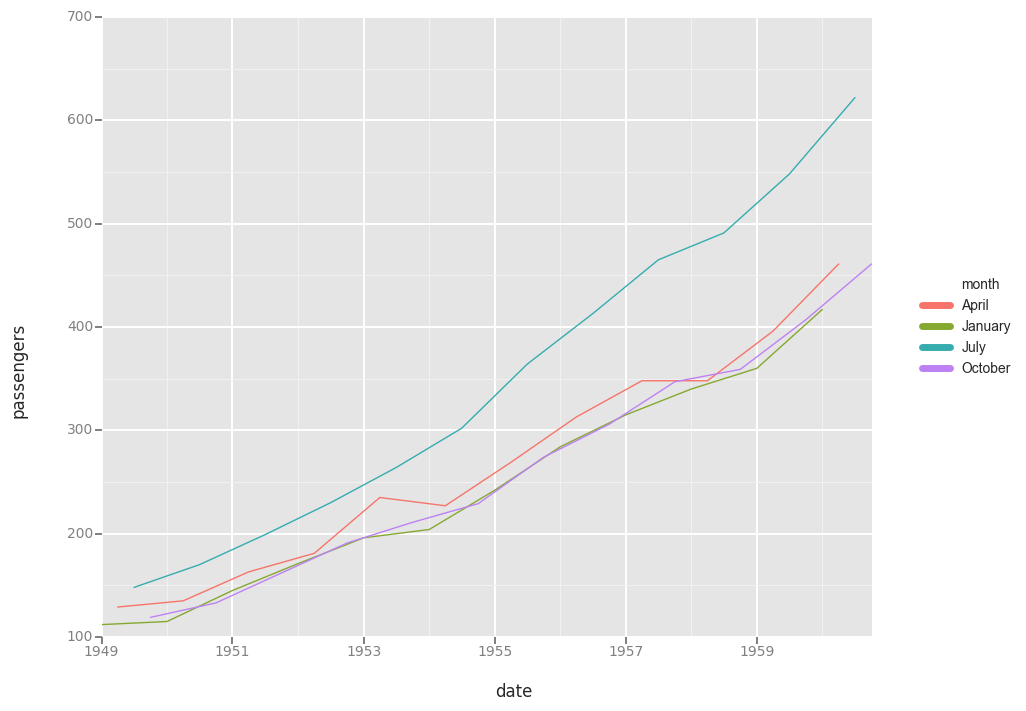

<ggplot: (-9223372036574745284)>

In [27]:
p = ggplot(seasons, aes(x = 'date', y = 'passengers', color = 'month')) + geom_line()
p

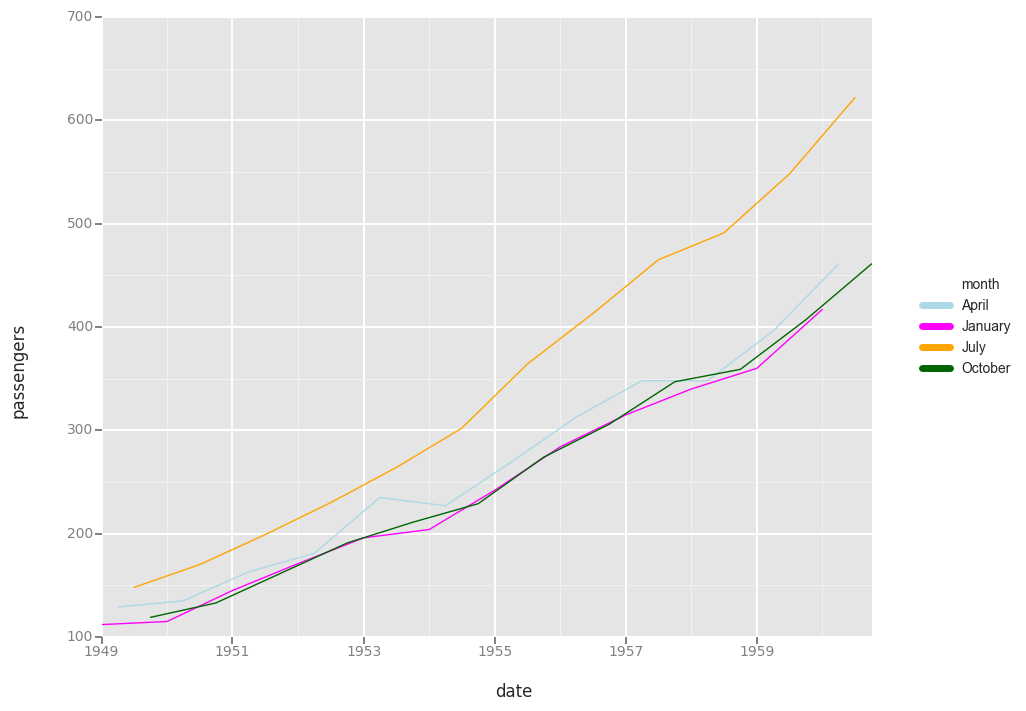

<ggplot: (-9223372036574745256)>

In [28]:
p = ggplot(seasons, aes(x = 'date', y = 'passengers', color = 'month')) + geom_line() \
    + scale_color_manual(values = ['lightblue', 'magenta', 'orange', 'darkgreen'])
p